## Introduction to Time Series
- Time Series is generally data which is collected over time and is dependent on it.
- Observations are typically collected at regular intervals
    - Every second/Minute/Hourly
    - Daily, Monthly, Quarterly, Yearly
- **Note**: Not every data collected with respect to time represents a time series.


        Methods of prediction & forecasting, time based data is Time Series Modeling


### Example of time series: 

    - Stock Market Price
    - Passenger Count of an airlines
    - Temperature over time 
    - Monthly Sales Data
    - Quarterly/Annual Revenue
    - Hourly Weather Data/Wind Speed
    - IOT sensors in Industries and Smart Devices
    - Energy Forecasting

### Key Concepts of a Time Series:
1. `Trend`: Trend is a general direction in which something is developing or changing. 
2. `Seasonality`: Any predictable change or pattern in a time series that recurs or repeats over a specific time period.
3. `Cyclic`
4. `Stationary` 

### Stationary and Non-Stationary Time Series
`Stationary`: 
1. Mean is constant
2. Standard Deviation is constant
3. an autocovariance that does not depend on time
4. No trend or Seasonality

`Non-Stationary`: There are 2 major reasons behind non-stationary of a Time Series
1. Trend - varying mean over time (mean is not constant)
2. Seasonality - variations at specific time-frames (standard deviation is not constant)


#### Difference between `Time Series` and `Regression`
- `Time Series` is time dependent. But the basic assumption of a linear regression model is that the observations are independent. 
- Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends

**Note** 
    - Predicting a time series using regression techniques is not a good approach.
    - Time series forecasting is the use of a model to predict future values based on previously observed values.


In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
from datetime import datetime

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
##
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')
df.head(2)

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268


In [3]:
## Datetime object
df["Quarter"] = pd.to_datetime(df["Quarter"])
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [4]:
##
fig = px.line(df, x = 'Quarter', y = 'Revenue', title = 'Amazon Revenue Slider')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list(
            [
             dict(count = 1, label = '1y', step = "year", stepmode = 'backward'),
             dict(count = 2, label = '3y', step = "year", stepmode = 'backward'),
             dict(count = 3, label = '5y', step = "year", stepmode = 'backward'),
             dict(step = "all"),
            ]
        )
    )
)

fig.show()

In [5]:
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])
print("\nFeatures: \n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().any())
print("\nUnique values : \n", df.nunique())

Rows    :  61
Columns :  3

Features: 
 ['Quarter', 'Revenue', 'Net Income']

Missing Values:
 Quarter       False
Revenue       False
Net Income    False
dtype: bool

Unique values : 
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [6]:
##
amazon_df = df.set_index("Quarter")

### `KPSS Test`
Kwiatkowski-Phillips-Schmidt-Shin test for stationarity of a series around a deterministic trend..

Computes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary.

`Null hypothesis` - data is stationary <br>
`Alternate hypothesis` - data is not stationary

In [7]:
from statsmodels.tsa.stattools import kpss

In [8]:
tstest = kpss(amazon_df['Revenue'], 'ct')
## 'ct': The data is stationary around trend

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [9]:
tstest

(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

p = 0.02995 which is less that 0.05 --> Null hypothesis is rejected hence data is not stationary

### `Decompostion`

`Additive` : $y_{t} = T_{t} + C_{t} + S_{t} + I_{t}$ <br>
`Multiplicative` : $y_{t} = T_{t} \times C_{t} \times S_{t} \times I_{t}$

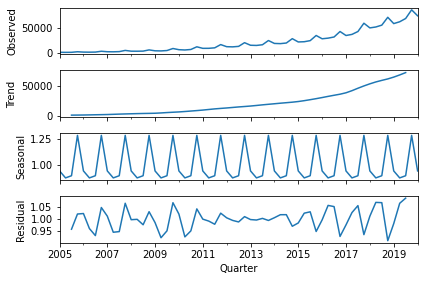

In [10]:
import statsmodels.api as sm

## Seasonal decompose
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'], model = 'multiplicative')
resplot =  res.plot()

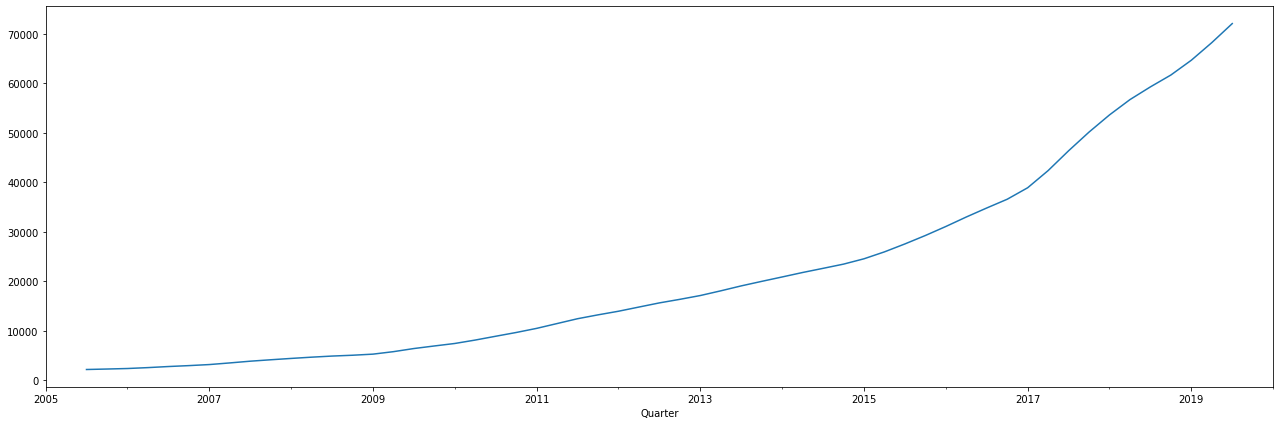

In [11]:
plt.figure(figsize=(22,7))
res.trend.plot()

In [12]:
res.observed

Quarter
2020-03-31    75452
2019-12-31    87437
2019-09-30    69981
2019-06-30    63404
2019-03-31    59700
              ...  
2006-03-31     2279
2005-12-31     2977
2005-09-30     1858
2005-06-30     1753
2005-03-31     1902
Name: Revenue, Length: 61, dtype: int64

In [13]:
res.trend

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: Revenue, Length: 61, dtype: float64

In [14]:
res.seasonal

Quarter
2020-03-31    0.941840
2019-12-31    1.289518
2019-09-30    0.894993
2019-06-30    0.873649
2019-03-31    0.941840
                ...   
2006-03-31    0.941840
2005-12-31    1.289518
2005-09-30    0.894993
2005-06-30    0.873649
2005-03-31    0.941840
Name: Revenue, Length: 61, dtype: float64

In [15]:
res.resid

Quarter
2020-03-31         NaN
2019-12-31         NaN
2019-09-30    1.084496
2019-06-30    1.063372
2019-03-31    0.979831
                ...   
2006-03-31    1.021253
2005-12-31    1.019256
2005-09-30    0.956844
2005-06-30         NaN
2005-03-31         NaN
Name: Revenue, Length: 61, dtype: float64

In [16]:
## check
res.observed[2]

69981

In [17]:
res.trend[2] * res.seasonal[2] * res.resid[2]

69980.99999999999

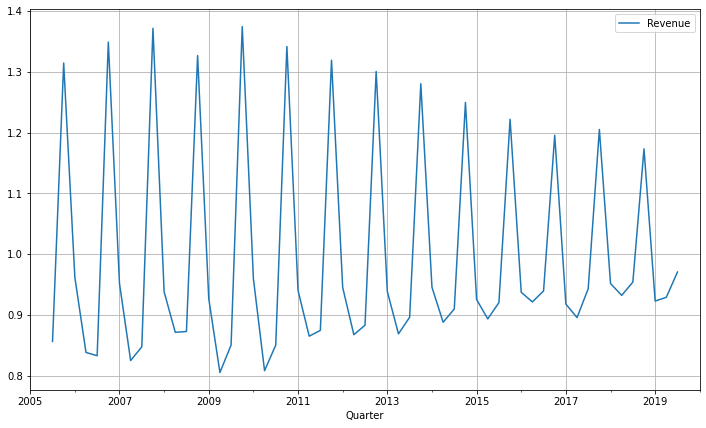

In [18]:
## Removing trend in data by dividing --multiplicative model
pd.DataFrame(res.observed/res.trend).plot(figsize=(12,7), grid=True);

Now, the simple ARIMA model can be used for analysis

**Reference**
1. (AI Engineering) Time series decomposition and analysis Using Python (YouTube Link: https://www.youtube.com/watch?v=pLHm4cvoZiY&list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK&index=5 )
